In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import   StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from catboost import CatBoostRegressor

In [51]:
df = pd.read_csv('Walmart.csv')

In [167]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day_of_week,month
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4.0,9.0
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4.0,10.0
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4.0,10.0
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4.0,10.0
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667,4.0,10.0


In [52]:
df['Date'] = pd.to_datetime(df['Date'],format ="%d-%m-%Y")

In [157]:
df['day_of_week'] = df['Date'].dt.day_of_week.astype('float64')

In [54]:
df['month'] = df['Date'].dt.month.astype('float64')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   day_of_week   6435 non-null   float64       
 9   month         6435 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 502.9 KB


In [55]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day_of_week,month
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,4.0,6.447552
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,4.0,1.000000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.0,4.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.0,6.000000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.0,9.000000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,4.0,12.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.0,3.238308


In [159]:
df_heatmap = df.drop('Date',axis=1).corr(method='pearson')

In [160]:
df_heatmap = df_heatmap.corr(method='pearson')

<Axes: >

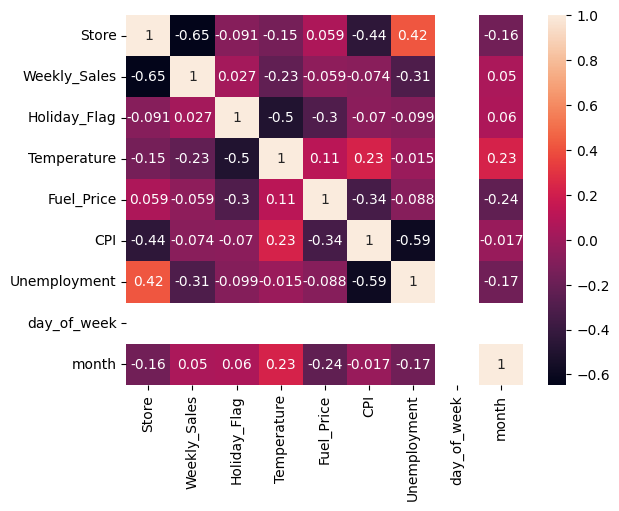

In [161]:
sns.heatmap(df_heatmap, annot=True)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   day_of_week   6435 non-null   float64       
 9   month         6435 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 502.9 KB


In [59]:
df_1 = df.drop('Date',axis=1)

In [60]:
y = df_1.pop('Weekly_Sales')

In [61]:
x = df_1

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [67]:
x.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day_of_week,month
0,1,0,42.31,2.572,211.096358,8.106,4.0,2.0
1,1,1,38.51,2.548,211.242170,8.106,4.0,2.0
2,1,0,39.93,2.514,211.289143,8.106,4.0,2.0
3,1,0,46.63,2.561,211.319643,8.106,4.0,2.0
4,1,0,46.50,2.625,211.350143,8.106,4.0,3.0


In [101]:
X_train.columns

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'day_of_week', 'month'],
      dtype='object')

In [102]:
preprocessor = ColumnTransformer(
    transformers=[(
        'scal',StandardScaler(),['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI','Unemployment', 'day_of_week', 'month']
    )]
)

In [104]:
preprocessor

ColumnTransformer(transformers=[('scal', StandardScaler(),
                                 ['Store', 'Holiday_Flag', 'Temperature',
                                  'Fuel_Price', 'CPI', 'Unemployment',
                                  'day_of_week', 'month'])])

In [105]:
pipeline = make_pipeline(
    preprocessor,
    RandomForestRegressor()
)

In [163]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scal', StandardScaler(),
                                                  ['Store', 'Holiday_Flag',
                                                   'Temperature', 'Fuel_Price',
                                                   'CPI', 'Unemployment',
                                                   'day_of_week', 'month'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [164]:
y_pred_rf = pipeline.predict(X_test)

In [165]:
mse_rf= mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse) 

In [166]:
print('mse',mse_rf)
print('r2',r2_rf)
print('rmse',rmse_rf)

mse 19293205773.077324
r2 0.9401119590063474
rmse 138128.29803902726


In [167]:
param_grid = {
    'randomforestregressor__random_state':[None,20,42],
    'randomforestregressor__max_depth':[10,50,100]
}

In [168]:
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5,n_jobs=-1)


In [169]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('scal',
                                                                         StandardScaler(),
                                                                         ['Store',
                                                                          'Holiday_Flag',
                                                                          'Temperature',
                                                                          'Fuel_Price',
                                                                          'CPI',
                                                                          'Unemployment',
                                                                          'day_of_week',
                                                                          'month'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [10, 50, 100],
                         'randomforestregressor__random_state': [None, 20, 42]})

In [170]:
y_pred_rf_grid = grid.predict(X_test)

In [172]:
best_params = grid.best_params_
mse_fr_grid = mean_squared_error(y_test, y_pred_rf_grid)
r2_fr_grid = r2_score(y_test, y_pred)
rmse_fr_grid = np.sqrt(mse) 

In [173]:
print('best parm',best_params)
print('mse',mse_fr_grid)
print('r2',r2_fr_grid)
print('rmse',rmse_fr_grid)

best parm {'randomforestregressor__max_depth': 50, 'randomforestregressor__random_state': None}
mse 18914317531.083748
r2 0.940775550578182
rmse 138128.29803902726


In [174]:
scor = cross_val_score(grid,x,y,cv=5,n_jobs = -1)

In [175]:
print('mse cross val',-np.mean(scor))

mse cross val 0.8346484305534236


In [115]:
pipeline_SCR = make_pipeline(
    preprocessor,
    SVR()
)

In [116]:
param_grid_SVR = {
    'svr__C':[1,10,100]
}

In [117]:
grid_SVR = GridSearchCV(pipeline_SCR,param_grid=param_grid_SVR,cv=5,n_jobs=-1)

In [118]:
grid_SVR.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('scal',
                                                                         StandardScaler(),
                                                                         ['Store',
                                                                          'Holiday_Flag',
                                                                          'Temperature',
                                                                          'Fuel_Price',
                                                                          'CPI',
                                                                          'Unemployment',
                                                                          'day_of_week',
                                                                          'month'])])),
                                       ('svr', SVR())]),
             n_jobs=-1, param_grid={'svr__C': [1, 10, 100]})

In [119]:
scor_SVR = cross_val_score(grid_SVR,x,y,cv=5,n_jobs=-1)

In [120]:
y_pred_SVR = grid_SVR.predict(X_test)

In [121]:
best_params_SVR = grid_SVR.best_params_
mse_SVR = mean_squared_error(y_test, y_pred_SVR)
r2_SVR = r2_score(y_test, y_pred_SVR)
rmse_SVR = np.sqrt(mse) 

In [122]:
print('best parm SVR',best_params_SVR)
print('mse SVR',mse_SVR)
print('r2 SVR',r2_SVR)
print('rmse SVR',rmse_SVR)

best parm SVR {'svr__C': 100}
mse SVR 328363492531.48883
r2 SVR -0.019273133394259734
rmse SVR 138128.29803902726


In [123]:
print('mse cross val SVR',-np.mean(scor_SVR))

mse cross val SVR 0.342414293454255


In [128]:
pipeline_cat = make_pipeline(
    preprocessor,
    CatBoostRegressor()
)

In [131]:
cat_model = CatBoostRegressor()

In [132]:
cat_model.fit(X_train,y_train)

Learning rate set to 0.053042
0:	learn: 550366.2282037	total: 156ms	remaining: 2m 35s
1:	learn: 537885.3825445	total: 157ms	remaining: 1m 18s
2:	learn: 524615.2863231	total: 159ms	remaining: 52.8s
3:	learn: 513623.5824316	total: 160ms	remaining: 39.9s
4:	learn: 501288.6868962	total: 162ms	remaining: 32.2s
5:	learn: 492255.2526123	total: 163ms	remaining: 27s
6:	learn: 480550.6251267	total: 165ms	remaining: 23.5s
7:	learn: 472454.4313208	total: 167ms	remaining: 20.7s
8:	learn: 464352.3965966	total: 168ms	remaining: 18.5s
9:	learn: 456879.7599326	total: 170ms	remaining: 16.8s
10:	learn: 449388.8190921	total: 171ms	remaining: 15.4s
11:	learn: 442069.5362303	total: 173ms	remaining: 14.2s
12:	learn: 435982.0823065	total: 174ms	remaining: 13.2s
13:	learn: 431026.5087078	total: 176ms	remaining: 12.4s
14:	learn: 423473.9187825	total: 177ms	remaining: 11.6s
15:	learn: 417798.6913395	total: 179ms	remaining: 11s
16:	learn: 411604.6735955	total: 180ms	remaining: 10.4s
17:	learn: 405652.6848651	tota

In [133]:
y_pred_cat = cat_model.predict(X_test)

In [147]:
scor_cat = r2_score(y_test,y_pred_cat)

In [148]:
scor_cat

0.964732872578792

In [155]:
mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)
rmse_cat = np.sqrt(mse) 

In [156]:
print('mse cat',mse_cat)
print('r2 cat',r2_cat)
print('rmse cat',rmse_cat)

mse cat 11361466080.261648
r2 cat 0.964732872578792
rmse cat 138128.29803902726


In [153]:
print(cat_model.get_best_score())

{'learn': {'RMSE': 69044.13954790772}}


In [138]:
param_grid_cat = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300]
}

In [139]:
grid_cat = GridSearchCV(cat_model,param_grid_cat,cv=5,n_jobs=-1)

In [140]:
grid_cat.fit(X_train,y_train)

0:	learn: 532012.5512924	total: 17.1ms	remaining: 5.11s
1:	learn: 498698.6472767	total: 33.8ms	remaining: 5.03s
2:	learn: 468744.5610291	total: 50ms	remaining: 4.95s
3:	learn: 447395.9310958	total: 65.6ms	remaining: 4.85s
4:	learn: 427659.8277854	total: 83.3ms	remaining: 4.91s
5:	learn: 408988.0628313	total: 98.6ms	remaining: 4.83s
6:	learn: 392816.8163419	total: 115ms	remaining: 4.82s
7:	learn: 377495.7545478	total: 132ms	remaining: 4.82s
8:	learn: 358805.1807626	total: 148ms	remaining: 4.78s
9:	learn: 347242.5803413	total: 165ms	remaining: 4.77s
10:	learn: 333521.0626119	total: 181ms	remaining: 4.77s
11:	learn: 323988.9926486	total: 197ms	remaining: 4.74s
12:	learn: 318320.3484690	total: 213ms	remaining: 4.71s
13:	learn: 305321.6507537	total: 230ms	remaining: 4.69s
14:	learn: 295044.0027483	total: 246ms	remaining: 4.67s
15:	learn: 287126.4087210	total: 263ms	remaining: 4.67s
16:	learn: 281643.9267119	total: 280ms	remaining: 4.66s
17:	learn: 273539.2629595	total: 298ms	remaining: 4.67

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000021517EFC1D0>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [100, 200, 300],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [142]:
grid_cat.best_params_

{'depth': 10, 'iterations': 300, 'learning_rate': 0.1}

In [144]:
y_pred_grid_cat = grid_cat.predict(X_test)

In [145]:
scor_grid_cat = r2_score(y_test,y_pred_grid_cat)

In [146]:
scor_grid_cat

0.9613635040004809

Вывод:
в работе использовался метод RandomForestRegressor,SVR ,CatBoostRegressor.
RandomForestRegressor показал след. значения:
mse 19293205773.077324
r2 0.9401119590063474
rmse 138128.29803902726
SVR показал след. значения:
mse SVR 328363492531.48883
r2 SVR -0.019273133394259734
rmse SVR 138128.29803902726
CatBoostRegressor показал след. значения:
mse cat 11361466080.261648
r2 cat 0.964732872578792
rmse cat 138128.29803902726

CatBoost показало лучшее значение, поэтому сохранияем эту модель
так же кроссвалидация не дает большое улучшение метрик.
в дальнейшем можно попробовать убрать параметры, которые имеют маленький вес

In [176]:
import pickle 

In [178]:
pickle.dump(cat_model, open('cat_model.pkl', 'wb'))

In [179]:
load_model = pickle.load(open('cat_model.pkl', 'rb'))

In [181]:
load_model.score(X_test, y_test)

0.964732872578792